# Connect to folder

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully!")
    %tensorflow_version 2.x
except Exception as e:
    print("Error while mounting Google Drive: {}".format(str(e)))

Mounted at /content/drive
Google Drive mounted successfully!


In [ ]:
import os 
path_to_drive = '/content/drive/MyDrive/Capstone Project files/Matt_folder' 
os.chdir(path_to_drive)
print(os.getcwd()) 

/content/drive/.shortcut-targets-by-id/17ASRcCWPKR_C9EEaMjcaL9Z8sFgwVxkv/Capstone Project files/Matt_folder


# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error,classification_report, roc_curve 

import re
from functools import reduce
from collections import Counter

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

%matplotlib inline

In [ ]:
#sequential
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.models import model_from_json

# Load data

In [ ]:
def get_n_dummies():
    model_data=pd.read_csv('modeldata.csv')
    model_data=model_data.astype({'licensed':'category',"host_in_sfo":'category',
                               "host_is_superhost":'category',
                                "host_has_profile_pic":'category',"host_identity_verified":'category',
                              "instant_bookable":'category','neighbourhood_cleansed':'category',
                             'property_type':'category','room_type':'category',
                             'bathrooms_text':'category','bedrooms':'category'
                             })

    dummy_columns=['host_is_superhost','host_has_profile_pic','host_identity_verified',
               'neighbourhood_cleansed','property_type','room_type','bathrooms_text','bedrooms','instant_bookable','licensed',"host_in_sfo"]

    for i in dummy_columns:
        if len(model_data.groupby([i]).size())>2:
            encoded_data=pd.get_dummies(model_data,prefix=[i],columns=[i],drop_first=False)
    encoded_data=pd.get_dummies(model_data,drop_first=False)
    encoded_data.drop(['Unnamed: 0'],axis=1,inplace=True)
    return encoded_data

In [ ]:
encoded_data=get_n_dummies()
encoded_data.shape

(6340, 75)

In [ ]:
# check data types of all columns 
display(encoded_data.dtypes) 

host_response_time                                     int64
host_response_rate                                     int64
host_acceptance_rate                                   int64
host_total_listings_count                            float64
accommodates                                           int64
beds                                                 float64
minimum_nights                                         int64
maximum_nights                                         int64
minimum_minimum_nights                               float64
maximum_minimum_nights                               float64
minimum_maximum_nights                               float64
maximum_maximum_nights                               float64
minimum_nights_avg_ntm                               float64
maximum_nights_avg_ntm                               float64
number_of_reviews                                      int64
number_of_reviews_ltm                                  int64
number_of_reviews_l30d  

# Visualize 

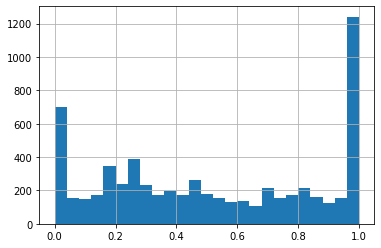

In [ ]:
# success rate histogram for report
# encoded_data['Success_rate'].hist(bins=25, figsize=(16,10)) # large 
encoded_data['Success_rate'].hist(bins=25, figsize=(6,4)) 
plt.show() 

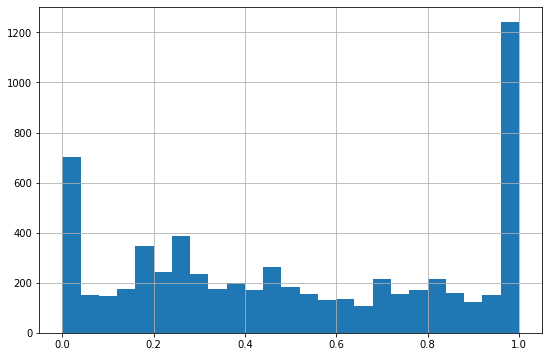

In [ ]:
# success rate histogram for slides 
encoded_data['Success_rate'].hist(bins=25, figsize=(9,6)) 
plt.show() 

## Correlation between target variable and predictors 

*Not used in report*

In [ ]:
''' 
pd.set_option('display.max_rows',None) 
cols2drop = ['review_scores_rating', 'review_scores_location', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']
correlation=encoded_data.drop(cols2drop, axis = 1).corr() 
'''

" \npd.set_option('display.max_rows',None) \ncols2drop = ['review_scores_rating', 'review_scores_location', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication']\ncorrelation=encoded_data.drop(cols2drop, axis = 1).corr() \n"

In [ ]:
'''
for a, b in correlation['Success_rate'].sort_values(ascending=False).head(11).iteritems():
   print(a+','+str(b))
# ^^^ write to file???     
'''

"\nfor a, b in correlation['Success_rate'].sort_values(ascending=False).head(11).iteritems():\n   print(a+','+str(b))\n# ^^^ write to file???     \n"

In [ ]:
'''
for a, b in correlation['Success_rate'].sort_values(ascending=True).head(10).iteritems(): 
   print(a+','+str(b))   
# ^^^ write to file???       
''' 

"\nfor a, b in correlation['Success_rate'].sort_values(ascending=True).head(10).iteritems(): \n   print(a+','+str(b))   \n# ^^^ write to file???       \n"

# Partition the data for regression

In [ ]:
X=encoded_data.drop(['Success_rate'],axis=1)
Y=round(encoded_data['Success_rate'],4)  

In [ ]:
#train, valid & test test split 
#X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.3,random_state=1) 
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,test_size=0.20,shuffle=True,random_state=1) 
X_train.shape,X_valid.shape 

((5072, 74), (1268, 74))

In [ ]:
# normalize the predictors
cols=X_train.columns
# scaler=preprocessing.MinMaxScaler()
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_train=pd.DataFrame(X_train,columns=cols)
X_valid=pd.DataFrame(X_valid,columns=cols)
X_train.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_years,mean_price,top_amenities_count,host_verification_count,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Group1,neighbourhood_cleansed_Group2,property_type_Entire condominium (condo),property_type_Entire guest suite,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Private room in condominium (condo),property_type_Private room in guest suite,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in hostel,property_type_other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_bath group1,bathrooms_text_bath group2,bathrooms_text_bath group3,bathrooms_text_bath group4,bathrooms_text_bath group5,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_More than 3,instant_bookable_f,instant_bookable_t,host_in_sfo_0.0,host_in_sfo_1.0,licensed_0.0,licensed_1.0
count,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03,5.072000e+03
mean,3.669515e-16,-6.200788e-16,-1.718307e-17,5.833487e-18,1.154768e-16,4.793419e-16,-7.970972e-17,-2.297934e-16,4.520678e-17,1.171896e-16,-1.423677e-16,1.599858e-16,-1.412185e-16,6.571934e-16,-9.346712e-17,-5.907910e-17,-1.177314e-16,9.259155e-17,1.191870e-16,-6.549265e-17,2.603070e-16,5.233721e-17,1.457824e-17,8.320106e-17,-4.182161e-16,-3.994789e-16,4.177564e-17,-4.867295e-16,3.540587e-18,3.537304e-16,1.911808e-16,-7.354790e-18,9.473670e-17,3.204040e-17,2.138854e-16,-4.983746e-16,4.424256e-16,-3.742844e-16,3.742844e-16,2.171414e-16,6.309359e-16,5.446211e-16,4.160272e-16,1.738664e-16,-4.444504e-16,-2.643182e-16,2.230296e-16,6.088004e-16,-5.087938e-16,1.707471e-16,-2.248410e-16,-3.043591e-16,2.249012e-16,-8.919872e-17,3.645984e-16,5.656184e-17,1.174528e-15,-4.561283e-16,2.015223e-15,-7.157786e-17,-2.903172e-16,4.088913e-16,-2.741629e-16,-1.225273e-15,4.203613e-16,1.884227e-16,1.149186e-17,5.819040e-16,-9.981500e-17,9.981500e-17,3.096016e-16,-1.745011e-16,4.000261e-16,-2.505444e-16
std,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+00,1.000099e+

In [ ]:
display(X_train.dtypes) 

host_response_time                                   float64
host_response_rate                                   float64
host_acceptance_rate                                 float64
host_total_listings_count                            float64
accommodates                                         float64
beds                                                 float64
minimum_nights                                       float64
maximum_nights                                       float64
minimum_minimum_nights                               float64
maximum_minimum_nights                               float64
minimum_maximum_nights                               float64
maximum_maximum_nights                               float64
minimum_nights_avg_ntm                               float64
maximum_nights_avg_ntm                               float64
number_of_reviews                                    float64
number_of_reviews_ltm                                float64
number_of_reviews_l30d  

# DNN REGRESSION MODEL

In [ ]:
'''
# original model for reference 
model=Sequential()
model.add(Dense(16,input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model.add(Dense(1,activation='sigmoid'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='mae',optimizer=opt,metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()
'''

"\n# original model for reference \nmodel=Sequential()\nmodel.add(Dense(16,input_dim=X_train.shape[1], activation='relu'))\nmodel.add(Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))\nmodel.add(Dense(1,activation='sigmoid'))\n\nopt=tf.keras.optimizers.Adam(learning_rate=0.001)\n\nmodel.compile(loss='mae',optimizer=opt,metrics=[tf.keras.metrics.RootMeanSquaredError()])\nmodel.summary()\n"

In [ ]:
model_regression=Sequential()
model_regression.add(Dense(16,input_dim=X_train.shape[1], activation='relu'))
model_regression.add(Dense(8,activation='relu',kernel_regularizer=tf.keras.regularizers.L1(0.01)))
model_regression.add(Dense(1,activation='sigmoid'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)

model_regression.compile(loss='mae',optimizer=opt,metrics=[tf.keras.metrics.RootMeanSquaredError()])
model_regression.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                1200      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs=120 

model_regression.reset_states()

model_regression_history=model_regression.fit(X_train,Y_train,epochs=num_epochs,batch_size=32,validation_data=(X_valid, Y_valid),verbose=2)
model_regression_history 

Epoch 1/120
159/159 - 2s - loss: 0.5613 - root_mean_squared_error: 0.3549 - val_loss: 0.4921 - val_root_mean_squared_error: 0.3382 - 2s/epoch - 11ms/step
Epoch 2/120
159/159 - 0s - loss: 0.4401 - root_mean_squared_error: 0.3322 - val_loss: 0.4021 - val_root_mean_squared_error: 0.3336 - 270ms/epoch - 2ms/step
Epoch 3/120
159/159 - 0s - loss: 0.3637 - root_mean_squared_error: 0.3246 - val_loss: 0.3467 - val_root_mean_squared_error: 0.3319 - 291ms/epoch - 2ms/step
Epoch 4/120
159/159 - 0s - loss: 0.3219 - root_mean_squared_error: 0.3208 - val_loss: 0.3197 - val_root_mean_squared_error: 0.3320 - 278ms/epoch - 2ms/step
Epoch 5/120
159/159 - 0s - loss: 0.3000 - root_mean_squared_error: 0.3193 - val_loss: 0.3019 - val_root_mean_squared_error: 0.3260 - 281ms/epoch - 2ms/step
Epoch 6/120
159/159 - 0s - loss: 0.2887 - root_mean_squared_error: 0.3164 - val_loss: 0.2939 - val_root_mean_squared_error: 0.3223 - 294ms/epoch - 2ms/step
Epoch 7/120
159/159 - 0s - loss: 0.2829 - root_mean_squared_error:

In [ ]:
# model_regression_history.history['val_root_mean_squared_error']

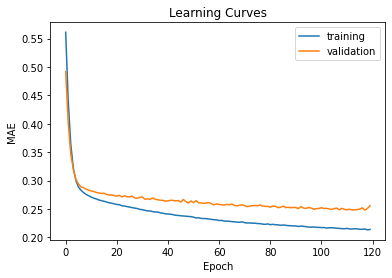

In [ ]:
# graph for report  
pyplot.figure(figsize=(6,4))
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MAE')
pyplot.plot(model_regression_history.history['loss'], label='training')
pyplot.plot(model_regression_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

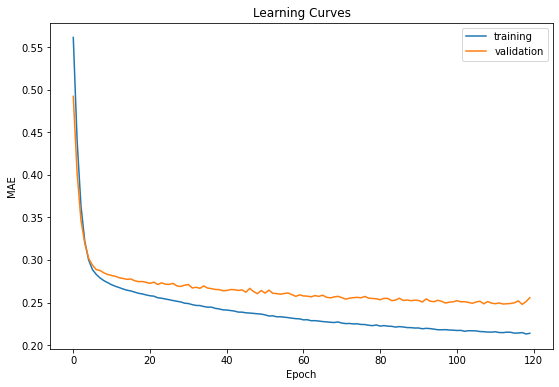

In [ ]:
# graph for slides 
pyplot.figure(figsize=(9,6))
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MAE')
pyplot.plot(model_regression_history.history['loss'], label='training')
pyplot.plot(model_regression_history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [ ]:
'''
pyplot.figure(figsize=(6,4))
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('MAE')
pyplot.plot(model_regression_history.history['mae'], label='training')
pyplot.plot(model_regression_history.history['val_mae'], label='validation')
pyplot.legend()
pyplot.show()
'''

"\npyplot.figure(figsize=(6,4))\npyplot.title('Learning Curves')\npyplot.xlabel('Epoch')\npyplot.ylabel('MAE')\npyplot.plot(model_regression_history.history['mae'], label='training')\npyplot.plot(model_regression_history.history['val_mae'], label='validation')\npyplot.legend()\npyplot.show()\n"

In [ ]:
model_regression.evaluate(X_train, Y_train,verbose=2)

159/159 - 0s - loss: 0.2167 - root_mean_squared_error: 0.2832 - 184ms/epoch - 1ms/step


[0.21668356657028198, 0.2832249701023102]

In [ ]:
model_regression.evaluate(X_valid, Y_valid,verbose=2)

40/40 - 0s - loss: 0.2557 - root_mean_squared_error: 0.3244 - 56ms/epoch - 1ms/step


[0.25566303730010986, 0.3243589699268341]

# Compare regression to naive model

*Not included in report*

In [ ]:
# get average success rate on training data 
mean = Y_train.mean() 
print('average success rate on training data:')
print(mean) 

average success rate on training data:
0.5154656545741316


In [ ]:
# check average against training 
error_train = 0 
for success_rate in Y_train:
  error_train += abs(mean - success_rate) 

# divide total error by length of training data 
mae_train = error_train/Y_train.shape[0] 
print('mean average error on training data:')
print(mae_train) 

mean average error on training data:
0.31075245661216594


In [ ]:
# check average against validation 
error_valid = 0 
for success_rate in Y_valid: 
  error_valid += abs(mean - success_rate) 

# divide total error by length of validation data 
mae_valid = error_valid/Y_valid.shape[0] 
print('mean average error on validation data:')
print(mae_valid) 

mean average error on validation data:
0.3182917295674146


# SAVE & LOAD MODEL

In [ ]:
# serialize model to JSON
model_regression_json = model_regression.to_json()
with open("model_regression.json", "w") as json_file:
    json_file.write(model_regression_json)
# serialize weights to HDF5
model_regression.save_weights("model_regression.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
# from keras.models import model_from_json

json_file = open('model_regression.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_regression.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# evaluate loaded model on training data
loaded_model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
score = loaded_model.evaluate(X_train, Y_train, verbose=0)
print('RMSE on training data')
print("%s: %.3f " % (loaded_model.metrics_names[1], score[1])) 

RMSE on training data
root_mean_squared_error: 0.283 


In [ ]:
# evaluate loaded model on validation data
loaded_model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])
score = loaded_model.evaluate(X_valid, Y_valid, verbose=0)
print('RMSE on validation data') 
print("%s: %.3f " % (loaded_model.metrics_names[1], score[1]))

RMSE on validation data
root_mean_squared_error: 0.324 


In [ ]:
# evaluate (using metric MAE) loaded model on test data
loaded_model.compile(loss='mae', optimizer='adam', metrics=[tf.keras.metrics.MeanAbsoluteError()])
score = loaded_model.evaluate(X_valid, Y_valid, verbose=0)
print('MAE on validation data')
print("%s: %.3f " % (loaded_model.metrics_names[1], score[1]))

MAE on validation data
mean_absolute_error: 0.242 


# Run regression model on validation data

[Predicting with a Neural Network explained](https://youtu.be/Z0KVRdE_a7Q)

In [ ]:
X_valid.shape,Y_valid.shape

((1268, 74), (1268,))

In [ ]:
predictions_regression = model_regression.predict(X_valid, batch_size=32, verbose=2) 

40/40 - 0s - 85ms/epoch - 2ms/step


In [ ]:
predictions_regression[:10] 

array([[0.05247089],
       [0.8657403 ],
       [0.01099068],
       [0.99574375],
       [0.5228546 ],
       [0.35268164],
       [0.15921327],
       [0.8103521 ],
       [0.3298787 ],
       [0.8539878 ]], dtype=float32)

In [ ]:
predictions_regression_list = [] 
for n in predictions_regression: 
  predictions_regression_list.append(n[0]) 

In [ ]:
# convert test results to dataframe 
predictions_data = {'prediction': predictions_regression_list,
                    'actual': list(Y_valid)} 

In [ ]:
test_results_df = pd.DataFrame(predictions_data) 

In [ ]:
test_results_df['residuals'] = abs(test_results_df['prediction'] - test_results_df['actual']) 

In [ ]:
test_results_df.head(10) 

,prediction,actual,residuals
0,0.052471,0.0417,0.010771
1,0.865740,1.0000,0.134260
2,0.010991,0.0500,0.039009
3,0.995744,1.0000,0.004256
4,0.522855,0.0500,0.472855
5,0.352682,1.0000,0.647318
6,0.159213,0.1691,0.009887
7,0.810352,0.4858,0.324552
8,0.329879,0.6879,0.358021
9,0.853988,1.0000,0.146012


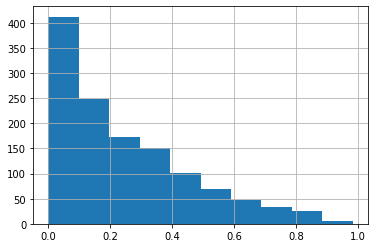

In [ ]:
test_results_df['residuals'].hist(figsize=(6,4))
plt.show() 

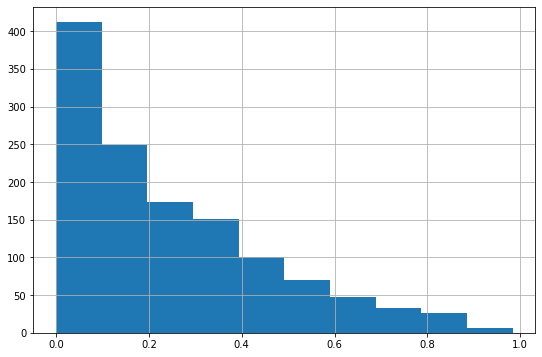

In [ ]:
test_results_df['residuals'].hist(figsize=(9,6))
plt.show() 

In [ ]:
# https://www.delftstack.com/howto/python-pandas/how-to-get-average-of-a-column-of-a-pandas-dataframe/
print(test_results_df['residuals'].mean()) 

0.24239322971932858


In [ ]:
print(test_results_df['residuals'].describe()) 

count    1268.000000
mean        0.242393
std         0.215618
min         0.000106
25%         0.064665
50%         0.183462
75%         0.365393
max         0.983592
Name: residuals, dtype: float64


In [ ]:
# https://www.statology.org/percentiles-in-python/
np.percentile(test_results_df['residuals'], 95) 

0.6945259097385401

# Residuals on entire dataset

*Not included in report*

In [ ]:
X_all=encoded_data.drop(['Success_rate'],axis=1)
Y_all=round(encoded_data['Success_rate'],4)  
# ^^^ is this necessary??? 

In [ ]:
#normalize the predictors
cols=X_all.columns
# scaler=preprocessing.MinMaxScaler()
scaler=StandardScaler()
X_all=scaler.fit_transform(X_all)
X_all=pd.DataFrame(X_all,columns=cols)
X_all.describe()

,host_response_time,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_years,mean_price,top_amenities_count,host_verification_count,host_is_superhost_f,host_is_superhost_t,host_has_profile_pic_f,host_has_profile_pic_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Group1,neighbourhood_cleansed_Group2,property_type_Entire condominium (condo),property_type_Entire guest suite,property_type_Entire loft,property_type_Entire rental unit,property_type_Entire residential home,property_type_Entire serviced apartment,property_type_Entire townhouse,property_type_Private room in condominium (condo),property_type_Private room in guest suite,property_type_Private room in rental unit,property_type_Private room in residential home,property_type_Room in aparthotel,property_type_Room in boutique hotel,property_type_Room in hotel,property_type_Shared room in hostel,property_type_other,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,bathrooms_text_bath group1,bathrooms_text_bath group2,bathrooms_text_bath group3,bathrooms_text_bath group4,bathrooms_text_bath group5,bedrooms_1.0,bedrooms_2.0,bedrooms_3.0,bedrooms_More than 3,instant_bookable_f,instant_bookable_t,host_in_sfo_0.0,host_in_sfo_1.0,licensed_0.0,licensed_1.0
count,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03,6.340000e+03
mean,5.750045e-16,3.616193e-16,-1.854983e-16,3.770993e-16,1.353316e-15,-1.593153e-15,2.520819e-15,1.611995e-15,1.068156e-15,-3.050876e-15,2.703060e-15,-4.745372e-17,2.100953e-15,-3.026387e-16,-3.673788e-15,8.431741e-17,-1.961225e-15,2.723584e-15,3.000264e-15,-1.025398e-15,4.371337e-15,3.859864e-15,8.867775e-16,-1.989908e-15,9.683982e-16,7.644866e-16,-2.954874e-16,6.708019e-15,1.156541e-16,3.069819e-15,-2.114397e-15,1.057325e-14,-1.055346e-14,-1.961378e-15,1.982593e-15,-1.687171e-15,1.671639e-15,-2.023583e-15,2.031375e-15,-8.000435e-16,-2.895773e-15,1.207805e-16,-1.722807e-15,-2.964619e-15,3.337980e-15,-8.507872e-16,1.750265e-17,8.482305e-16,1.450294e-15,1.473847e-15,7.542643e-16,-5.214835e-15,8.168282e-16,6.498613e-16,8.143941e-16,1.675561e-15,-4.868840e-15,5.959481e-16,-1.355251e-15,-3.332105e-15,2.721395e-15,5.468987e-16,1.444901e-15,4.022479e-17,-1.481692e-15,-9.513245e-16,3.053901e-16,5.466623e-16,-1.010058e-15,1.010058e-15,2.659177e-15,-2.659877e-15,1.875184e-14,-1.875184e-14
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+0

In [ ]:
pred_reg_all = model_regression.predict(X_all, batch_size=32, verbose=2) 

199/199 - 0s - 196ms/epoch - 984us/step


In [ ]:
pred_reg_all_list = [] 
for n in pred_reg_all: 
  pred_reg_all_list.append(n[0]) 

In [ ]:
# convert test results to dataframe 
pred_data_all = {'prediction': pred_reg_all_list,
                    'actual': list(Y_all)} 

In [ ]:
results_all_df = pd.DataFrame(pred_data_all) 

In [ ]:
results_all_df['residuals'] = abs(results_all_df['prediction'] - results_all_df['actual']) 

In [ ]:
results_all_df.head(10) 

,prediction,actual,residuals
0,0.596572,0.7130,0.116428
1,0.070255,0.0000,0.070255
2,0.093532,0.0000,0.093532
3,0.095919,0.0000,0.095919
4,0.066007,0.0000,0.066007
5,0.066145,0.2191,0.152955
6,0.446269,0.0750,0.371269
7,0.146457,0.7891,0.642643
8,0.671896,0.0000,0.671896
9,0.649746,0.9945,0.344754


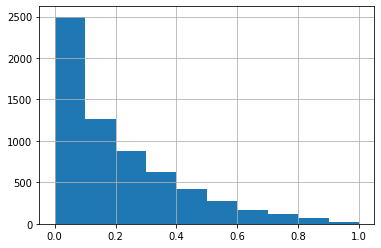

In [ ]:
results_all_df['residuals'].hist(figsize=(6,4)) 
plt.show() 

In [ ]:
# https://www.delftstack.com/howto/python-pandas/how-to-get-average-of-a-column-of-a-pandas-dataframe/
print(results_all_df['residuals'].mean()) 

0.21037726596276202


In [ ]:
print(results_all_df['residuals'].describe()) 

count    6.340000e+03
mean     2.103773e-01
std      2.012296e-01
min      7.152557e-07
25%      5.083614e-02
50%      1.459223e-01
75%      3.172375e-01
max      9.999996e-01
Name: residuals, dtype: float64


In [ ]:
# https://www.statology.org/percentiles-in-python/
np.percentile(results_all_df['residuals'], 95) 

0.6264470311379422